## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().sum()
# пропусков нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
X.info()
# все признаки числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knns = []
nbrs = [1, 3, 5, 10, 15, 25]
X_train_knn = pd.DataFrame(X_train[['alcohol', 'magnesium']])
X_test_knn = pd.DataFrame(X_test[['alcohol', 'magnesium']])

stdsc = StandardScaler()
X_train_knn_std = stdsc.fit_transform(X_train_knn)
X_test_knn_std = stdsc.transform(X_test_knn)
print('NN 	 Train 	 Test')

for n_neighbors in nbrs:
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(X_train_knn_std, y_train)
    knns.append(neigh)

    y_pred_train = neigh.predict(X_train_knn_std)
    y_pred_test = neigh.predict(X_test_knn_std)
    
    print(f'{n_neighbors} 	 {neigh.score(X_train_knn_std, y_train):.2f} 	 {neigh.score(X_test_knn_std, y_test):.2f}')


NN 	 Train 	 Test
1 	 0.99 	 0.67
3 	 0.84 	 0.65
5 	 0.81 	 0.69
10 	 0.81 	 0.70
15 	 0.78 	 0.69
25 	 0.73 	 0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [7]:
# !pip install mlxtend

!pip install mlxtend -U
# !pip install matplotlib==3.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

При использовании возникали ошибки с версиями (https://github.com/alan-turing-institute/CompEnv-Ex3/issues/10)

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

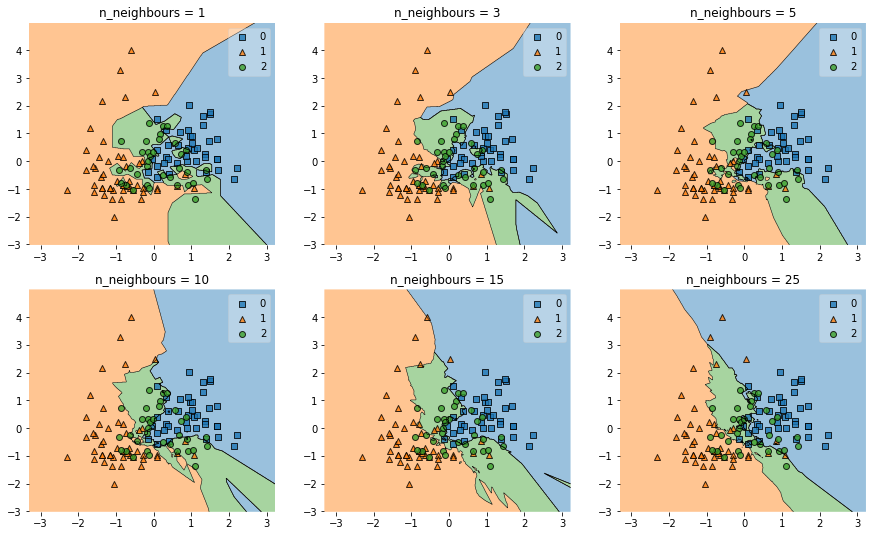

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from cycler import product

gs = gridspec.GridSpec(nrows=2, ncols=3)

fig = plt.figure(figsize=(15, 9))


for knn_, cnbr, grd in zip(knns, nbrs, product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_knn_std, y=y_train, clf=knn_)
    plt.title(f'n_neighbours = {cnbr}')


plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Видно, что на тесте максимальный скор угадывается при 10 соседях, но также не сильно отсает и при 5 соседях (в этом случае скор равен 0,69). Если смотреть на решающие поверхности, то по ним видно, что они подходят лучше всего, потому что практически отсутсвуют слишком резкие границы и острова с отдельными классами. Скорее всего оптимальное значение соседей будет между 5 и 10. Для этого обучим knn для этих значений соседей, чтобы более точно посмотреть на резульаты.

In [10]:
knns2 = []
nbrs2 = range(5, 11)

print('NN 	 Train 	 Test')

for n_neighbors in nbrs2:
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(X_train_knn_std, y_train)
    knns2.append(neigh)

    y_pred_train = neigh.predict(X_train_knn_std)
    y_pred_test = neigh.predict(X_test_knn_std)
    
    print(f'{n_neighbors} 	 {neigh.score(X_train_knn_std, y_train):.2f} 	 {neigh.score(X_test_knn_std, y_test):.2f}')


NN 	 Train 	 Test
5 	 0.81 	 0.69
6 	 0.79 	 0.65
7 	 0.80 	 0.70
8 	 0.80 	 0.72
9 	 0.78 	 0.70
10 	 0.81 	 0.70


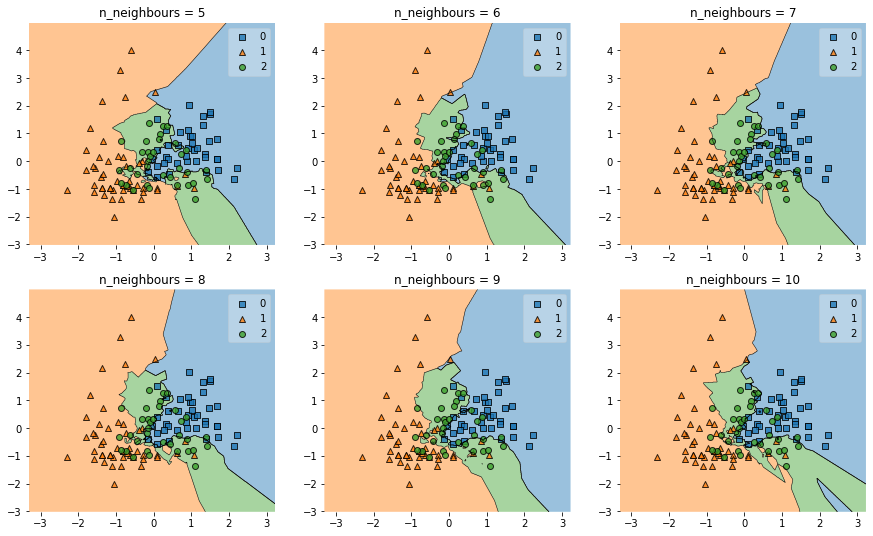

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from cycler import product

gs = gridspec.GridSpec(nrows=2, ncols=3)

fig = plt.figure(figsize=(15, 9))


for knn_, cnbr, grd in zip(knns2, nbrs2, product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_knn_std, y=y_train, clf=knn_)
    plt.title(f'n_neighbours = {cnbr}')


plt.show()

Видно, что среди этого диапазона 8 является лучшим значением для количества соседей, что подтверждается также и графиком, на котором отсутсвуют слишком резкие 'выбросы' областей по сравнению с другими.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

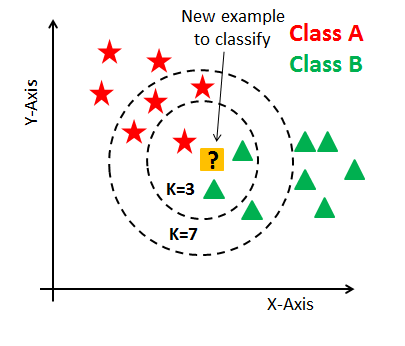

In [12]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            distances = []
            for j in range(len(self.X)):
                distances.append(np.linalg.norm(X[i] - self.X[j]))
            
            distances = np.array(distances)
            k_nearest_neighbors = np.argsort(distances)[:self.k]
            k_nearest_neighbors = self.y[k_nearest_neighbors]
            most_common = Counter(k_nearest_neighbors).most_common(1)
            y_pred.append(most_common[0][0])
        return np.array(y_pred)

In [13]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [14]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

Для скачивания использовал API ключ (уже не рабочий), поэтому для повторного запуска нужно либо скачать файл, либо вставить свой API ключ. 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! rm -r ~/.kaggle
! mkdir ~/.kaggle
! mv ./kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zusmani/pakistan-toshakhana-files                                  Pakistan ToshaKhana Files                             1MB  2023-03-15 16:25:43           2338        103  1.0              
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                  10KB  2023-03-10 15:39:14           1312         43  1.0              
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                      8KB  2023-02-01 12:22:51          14481        472  1.0              
datascientistanna/customers-dataset          

In [20]:
!kaggle datasets download -d shivam2503/diamonds

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 8.71MB/s]


In [21]:
! mkdir dmnds
! unzip /content/diamonds.zip -d dmnds


Archive:  /content/diamonds.zip
  inflating: dmnds/diamonds.csv      


In [22]:
data = pd.read_csv('dmnds/diamonds.csv')
data.head() 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [23]:
data.isnull().sum()
# пропусков нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [24]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

Вес, цена в зависимости от размера бриллианта и сами размеры друг с другом

In [26]:
corr_matrix = data[data.columns[~(data.dtypes == 'object')]].corrwith(data['price'])
corr_matrix

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64

In [27]:
# расположим признаки по 'силе' корреляции с таргетом
abs(corr_matrix).sort_values(ascending=False)

# сильнее всего коррелируют cart, x, y, z

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth    0.010647
dtype: float64

In [28]:
# матрица корреляций всех вещественных признаков друг с другом
data[data.columns[~data.columns.isin(['cut', 'color', 'clarity'])]].corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


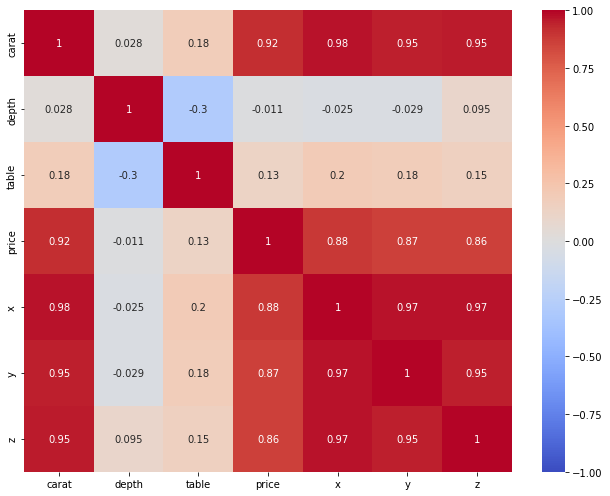

In [29]:
import seaborn as sns


plt.figure(figsize=(9, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.tight_layout()
plt.show()

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_obj = data.columns[(data.dtypes == 'object')]

model = OneHotEncoder()
s = model.fit_transform(data[cat_obj]).toarray()
data.drop(columns=cat_obj, inplace=True)
data = data.join(pd.DataFrame(s, columns=model.get_feature_names_out()))

In [31]:
data.info()
# все признаки теперь числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  float64
 8   cut_Good       53940 non-null  float64
 9   cut_Ideal      53940 non-null  float64
 10  cut_Premium    53940 non-null  float64
 11  cut_Very Good  53940 non-null  float64
 12  color_D        53940 non-null  float64
 13  color_E        53940 non-null  float64
 14  color_F        53940 non-null  float64
 15  color_G        53940 non-null  float64
 16  color_H        53940 non-null  float64
 17  color_I        53940 non-null  float64
 18  color_

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [32]:
from sklearn.model_selection import train_test_split


X = data.drop('price', axis=1)
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [33]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# для линейной регрессии добавим константный признак (bias)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Train score:", lr.score(X_train, y_train))
print("Test score:", lr.score(X_test, y_test))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_pred))

Train score: 0.9195976267987521
Test score: 0.9201866914388086
Train MSE = 1290541.9147
Test MSE = 1244765.4357


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.


Из графиков ниже таковыми можно считать все, кроме table, y, z, cut_Very Good, color_G

In [35]:
weights = lr.coef_
weights.shape

(27,)

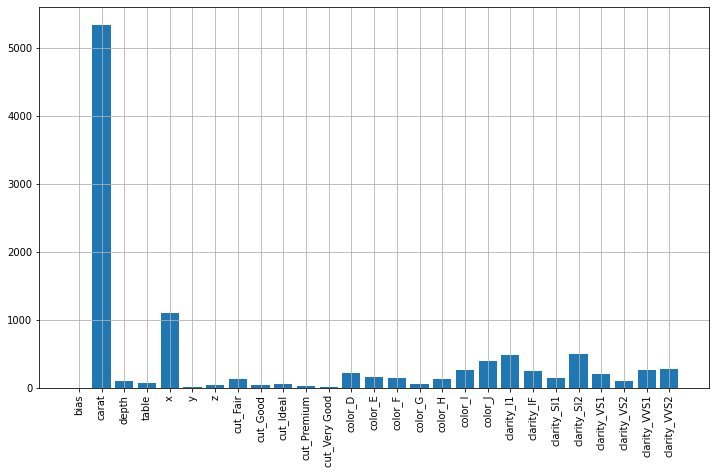

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 7))
plt.bar(['bias', *X.columns.values], abs(weights))
plt.grid()
plt.xticks(rotation=90);

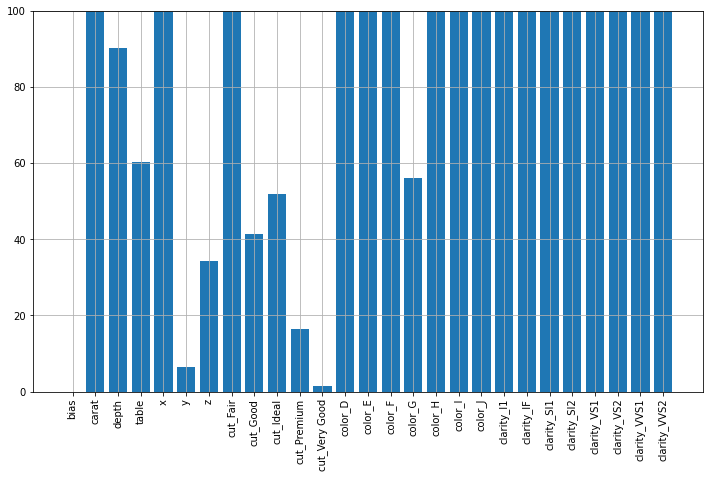

In [37]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 7))
plt.bar(['bias', *X.columns.values], abs(weights))
plt.grid()
plt.ylim(0, 100)
plt.xticks(rotation=90);

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

Не совсем понятно, что имелось в виду под сделать праметр регуляризации равным 10, приводя в пример L2, L1 регуляризации (формулы для них смотри выше), так как в sklearn используются немного другие функции ошибок (см. документацию). Поэтому ниже в коде просто использовалось `alpha = 10`.

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

lasso_pred_train = lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test)


print("Train score:", lasso.score(X_train, y_train))
print("Test score:", lasso.score(X_test, y_test))

print("Train MSE = %.4f" % mean_squared_error(y_train, lasso_pred_train))
print("Test MSE = %.4f" % mean_squared_error(y_test, lasso_pred_test))

lasso_coefs = lasso.coef_
print(f'Lasso weights:\n{lasso_coefs}')

Train score: 0.9188934044142715
Test score: 0.9194747337784517
Train MSE = 1301845.4182
Test MSE = 1255869.1013
Lasso weights:
[   0.         4872.15639556  -57.09361023  -47.68485714 -652.15744224
   -0.          -43.26536088 -126.50426086  -42.80932198   41.69581461
    0.           -0.          147.94933995   92.66322385   69.1393602
   -0.         -172.35946257 -279.01457714 -403.03069843 -488.72730006
  194.05330182 -252.3356645  -573.63563666  101.29825449   -0.
  187.49926273  193.99715195]


In [39]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

ridge_pred_train = ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test)



print("Train score:", ridge.score(X_train, y_train))
print("Test score:", ridge.score(X_test, y_test))
print("Train MSE = %.4f" % mean_squared_error(y_train, ridge_pred_train))
print("Test MSE = %.4f" % mean_squared_error(y_test, ridge_pred_test))

ridge_coefs = ridge.coef_
print(f'Ridge weights:\n{ridge_coefs}')

Train score: 0.9195935964193938
Test score: 0.9201717301618226
Train MSE = 1290606.6065
Test MSE = 1244998.7712
Ridge weights:
[ 0.00000000e+00  5.30128906e+03 -8.76398047e+01 -6.01236861e+01
 -1.05722889e+03 -9.60514861e+00 -3.80715442e+01 -1.25880000e+02
 -4.14803547e+01  5.19690360e+01  1.64495454e+01  1.54033130e+00
  2.11055842e+02  1.62246931e+02  1.39296135e+02  5.59072865e+01
 -1.30202420e+02 -2.50581034e+02 -3.86751101e+02 -4.73321397e+02
  2.44575156e+02 -1.47096586e+02 -4.91313752e+02  2.02359351e+02
  1.02000447e+02  2.54446988e+02  2.72034475e+02]


In [40]:
weights - lasso_coefs

# коэффициенты для линейной регрессии также почти на порядок отличаются

array([-2.96081174e-14,  4.66459275e+02, -3.30802068e+01, -1.26474228e+01,
       -4.48261408e+02, -6.45891672e+00,  9.00641625e+00,  7.93257420e-01,
        1.41333277e+00,  1.02963912e+01,  1.64647406e+01,  1.37080731e+00,
        6.33612013e+01,  6.98194476e+01,  7.06308750e+01,  5.61664668e+01,
        4.18619201e+01,  2.78045756e+01,  1.55328706e+01,  1.49015900e+01,
        5.01700547e+01,  1.05759727e+02,  8.21568522e+01,  1.01276669e+02,
        1.02180310e+02,  6.64736749e+01,  7.77833240e+01])

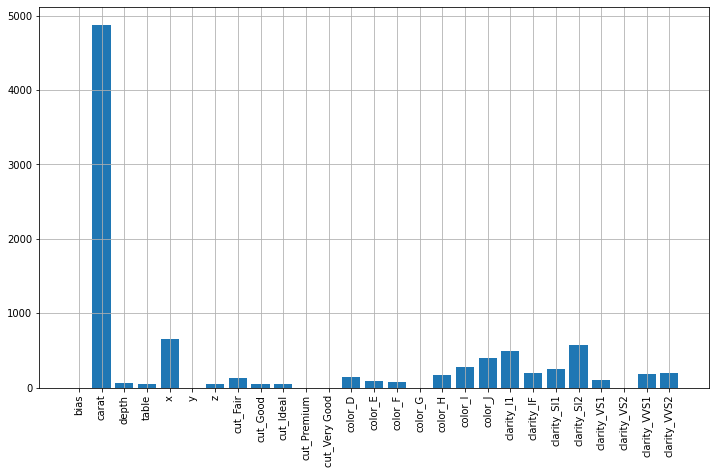

In [41]:
plt.figure(figsize=(12, 7))
labels = pd.Series(['bias', *X.columns.values])
plt.bar(labels, abs(lasso_coefs))
plt.grid()
plt.xticks(rotation=90);

In [42]:
weights - ridge_coefs

# коэффициенты для ридж регрессии почти не изменяются

array([-2.96081174e-14,  3.73266087e+01, -2.53401231e+00, -2.08593794e-01,
       -4.31899621e+01,  3.14623189e+00,  3.81259957e+00,  1.68996579e-01,
        8.43654442e-02,  2.31697838e-02,  1.51952712e-02, -1.69523983e-01,
        2.54699244e-01,  2.35740168e-01,  4.74100655e-01,  2.59180268e-01,
       -2.95122840e-01, -6.28967387e-01, -7.46726347e-01, -5.04313305e-01,
       -3.51799847e-01,  5.20648669e-01, -1.65032717e-01,  2.15572691e-01,
        1.79863693e-01, -4.74050559e-01, -2.53998706e-01])

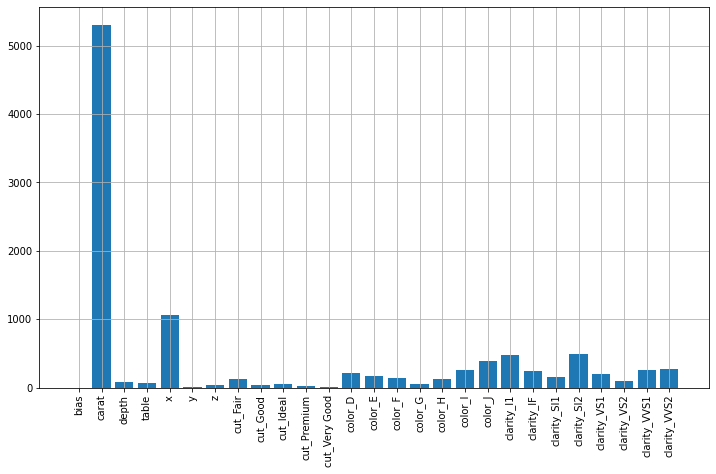

In [43]:
plt.figure(figsize=(12, 7))
plt.bar(labels, abs(ridge_coefs))
plt.grid()
plt.xticks(rotation=90);

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

Lasso делает это агрессивнее.

Так как Lasso часто зануляет некоторые признаки (см. картинку: пример для пространства признаков размерности 2)

<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/dcd/699/b61/dcd699b61da29bb25eb67e88d08452bd.png" width="75%" height="75%" />


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


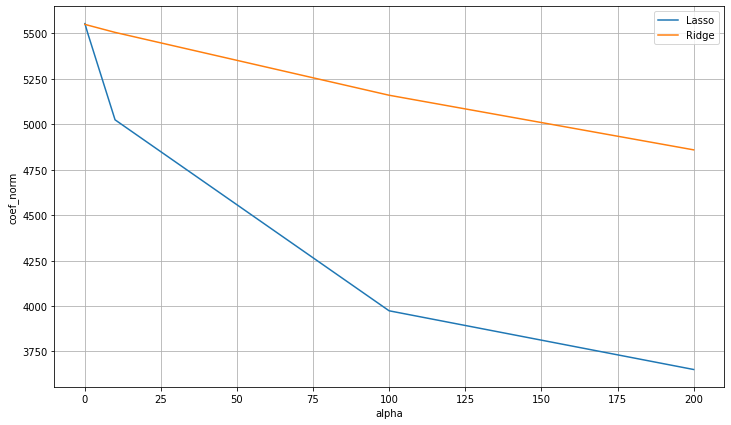

In [44]:
alphas = np.array([0.1, 1, 10, 100, 200])

ridge_coef_norms = []
lasso_coef_norms = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    lasso_coef_norms.append(np.linalg.norm(lasso.coef_))
    ridge_coef_norms.append(np.linalg.norm(ridge.coef_))


plt.figure(figsize=(12, 7))
plt.plot(alphas, lasso_coef_norms, label='Lasso')
plt.plot(alphas, ridge_coef_norms, label='Ridge')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('coef_norm')
plt.grid()
plt.show();


**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [45]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 1, 100)
lasso_cv = LassoCV(cv=5, random_state=42, alphas=alphas)
lasso_cv.fit(X_train, y_train)

error_matrix = lasso_cv.mse_path_

best_alpha = lasso_cv.alpha_


In [46]:
best_alpha

0.4534878508128582

In [47]:
lasso_cv.score(X_train, y_train)

0.9195962089147035

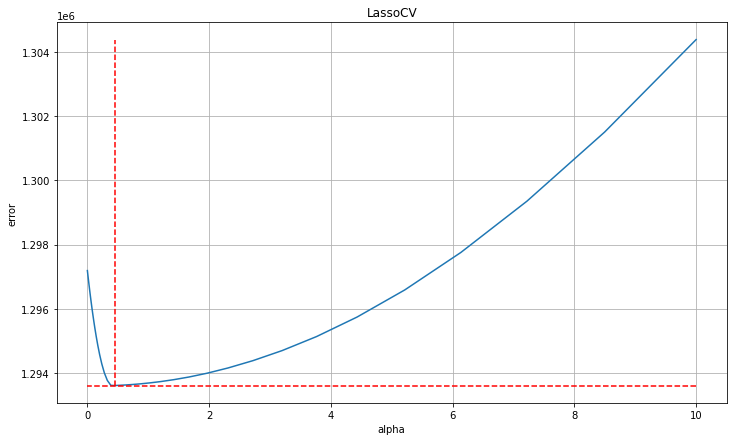

In [48]:
plt.figure(figsize=(12, 7))
plt.plot(lasso_cv.alphas_, error_matrix.mean(axis=1))
plt.hlines(error_matrix.mean(axis=1).min(), lasso_cv.alphas_[0], lasso_cv.alphas_[-1], linestyles='dashed', color='r')
plt.vlines(best_alpha, error_matrix.mean(axis=1).min(), error_matrix.mean(axis=1).max(), linestyles='dashed', color='r')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('LassoCV')
plt.grid()
plt.show();

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

Как и ожидалось масса бриллианта имеет основное влияние на цену, размеры также играют важную роль (почему только x? так как выше мы видели, что размеры сильно коррелирую друг с другом). Почему премиум огранка, G-цвет и VS2-качество оказались не информативными: мне кажется, что есть некоторая взаимосвязь между этими категориями (то есть, наверное, грань, например, между Premium, Ideal огранкой не всегда точна и поэтому нам достаточно только знаний об основных категориях и их различиях) 

In [49]:
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

best_coefs = best_lasso.coef_
best_coefs

array([    0.        ,  5317.65436716,   -88.65828781,   -59.7446019 ,
       -1080.79330484,    -5.4483517 ,   -34.80273619,  -131.84707477,
         -51.75996113,    33.93961095,     0.        ,   -13.65151882,
         164.88787707,   108.56125516,    86.15579439,    -0.        ,
        -180.18261811,  -292.02810393,  -417.51862955,  -501.44398653,
         200.36355949,  -251.34531183,  -582.45971166,   114.54855397,
          -0.        ,   192.36014112,   200.64447976])

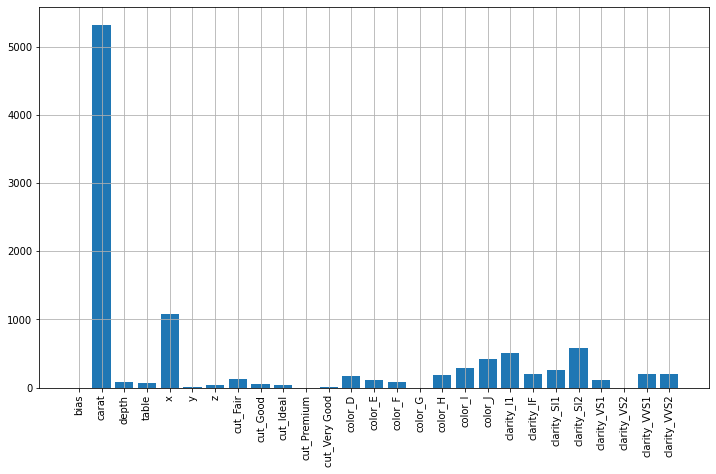

In [50]:
plt.figure(figsize=(12, 7))
plt.bar(labels, abs(best_coefs))
plt.grid()
plt.xticks(rotation=90);

In [51]:
not_inf_mask = np.abs(best_coefs) > 1e-3
print(f'Not informative features are {labels[~not_inf_mask].values}')

Not informative features are ['bias' 'cut_Premium' 'color_G' 'clarity_VS2']


In [52]:
inf_mask = np.abs(best_coefs) > 100
print(f'Informative features are {labels[inf_mask].values}')

Informative features are ['carat' 'x' 'cut_Fair' 'color_D' 'color_E' 'color_H' 'color_I' 'color_J'
 'clarity_I1' 'clarity_IF' 'clarity_SI1' 'clarity_SI2' 'clarity_VS1'
 'clarity_VVS1' 'clarity_VVS2']


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [53]:
test_lasso_pred = best_lasso.predict(X_test)


print("Test MSE = %.4f" % mean_squared_error(y_test, test_lasso_pred)) # vs Test MSE = 1255869.1013 from linreg

# получается, что лучше использовать линейную регрессию c регуляризацией, если сравнивать ошибки предсказаний на тестовой выборке
# ошибка mse отличается только в 3 знаке и поэтому, можно использовать обе модели (потому что если еще раз обучать модель, то результат может измениться в обратную сторону).
# Очень сильно влияет предобработка данных, поэтому, если, например, избавиться от мультиколлинеарности признаков или добавить новые, то обычная регрессия может стать и лучеше

Test MSE = 1244785.5605
